<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 2: Conceptos Generales</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 2.6: Conceptos del Procesamiento de Imágenes</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema e: Clasificación en Cascada</center></font></b>
</div>

## CLASIFICACIÓN EN CASCADA

Una de las principales aplicaciones de la visión computacional y del procesamiento de imágenes es la detección de objetos.

La detección de objetos empleando **Clasificación en Cascada** basada en el modelo HAAR (*Haar Wavelet*), es una metodología efectiva de detección que fue propuesta por ***Paul Viola*** y ***Michael Jones*** en un artículo que puede ser consultado [en esta liga](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf). 

Posteriormente, ***Rainer Lienhart***, ***Alexander Kuranov*** y ***Vadim Pisarevsky*** lo implementaron y mejoraron con una propuesta que puede ser consultada [en esta liga](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

La **Clasificación en Cascada** es una aproximación basada en **Aprendizaje Máquina (Machine Learning)** donde una función en cascada es entrenada a partir de un banco de imágenes con valores positivos y negativos. Posteriormente se emplea para la detección de objetos en otras imágenes.

Por otro lado, **OpenCV** provee un método de entrenamiento con modelos pre-entrenados, los cuales se han instalado con la librería **OpenCV** dentro de la carpeta `Data`, sin embargo, también pueden ser descargados desde [este enlace](https://github.com/opencv/opencv/tree/3.4/data/haarcascades).

La teoría detallada sobre la **Clasificación en Cascada** puede consultarse a través [de esta liga](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html).

Existe un tutorial detallado sobre el uso de la **Clasificación en Cascada** en **OpenCV**, el cual puede consultarse a través [de esta liga](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html).

En este subtema se describen algunos principios básicos de la **Clasificación en Cascada** empleando **OpenCV**.

Para ello, se realizará la carga de la imagen con los siguientes pasos:

1. Se cargan las librerías `OpenCV`, `PyLab`, `NumPy` y `Matplotlib`.
2. Se lee el archivo `Grupo.jpg`.
3. Se convierte del modo `BGR` a `RGB`.
4. Se convierte del modo `RGB` a `Escala de Grises` ya que se usarán ambos.
5. Se define el método `.rcParams()` de **PyLab** para visualizar la imagen con mejor tamaño.
6. Se imprime la imagen para verificación.

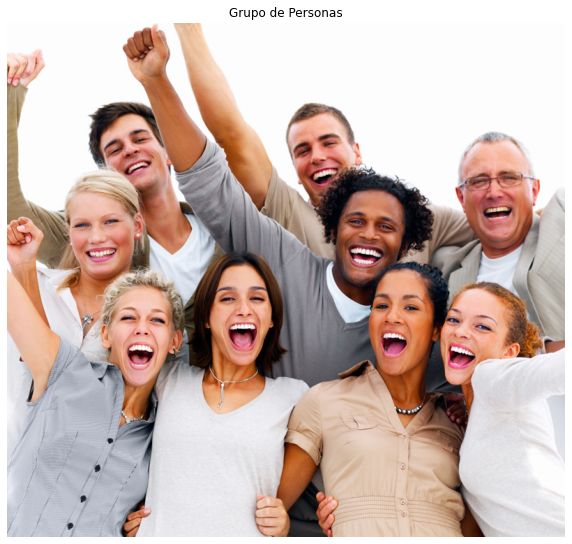

In [1]:
#Importación de Librerías
import cv2 
import pylab 
import numpy as np 
from matplotlib import pyplot as plt

#Tamaño de la Imagen
pylab.rcParams['figure.figsize'] = (10.0, 10.0) 

#Lectura de la Imagen desde un archivo JPG
Imagen = cv2.imread("./Imagenes/Grupo.jpg")    

#Modificación del Espacio de Color
Grupo = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)

#Imagen en Escala de Grises
Gris = cv2.cvtColor(Grupo, cv2.COLOR_RGB2GRAY)

#Impresión de la Imagen
plt.imshow(Grupo)
plt.axis('off')
plt.title("Grupo de Personas")
plt.show()

### Detección de Caras
Se empleará el modelo pre-entrenado para la detección de caras en la imagen. Este modelo está almacenado en el archivo `haarcascade_frontalface_default.xml` dentro de la carpeta `Modelos`. 

Para ello se debe de cargar el modelo pre-entrenado empleando el método `.CascadeClassifier()`, cuyo argumento es el nombre del archivo `XML` que contiene el entrenamiento.

Posteriormente se aplicará el método `.detectMultiScale(a,b,c)` el cual detecta objetos de diferentes tamaños desde la imagen de entrada con base en el modelo pre-entrenado, y los regresa como una lista de rectángulos. Sus argumentos son:

* El argumento `a`: Indica el nombre de la variable que contiene a la imagen en escala de grises.
* El argumento `b`: Indica el factor de escalamiento, es el tamaño de la reducción en cada iteración.
* El argumento `c`: Indica los vecindarios que cada rectángulo debe tener para mantenerlo.

La documentación detallada del método `.detectMultiScale()` se puede consultar [en esta liga](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498).

Para este ejemplo emplearemos la imagen `Grupo` en escala de grises para que sea más correcta la determinación de la operación de **Detección de Caras**, esto es:

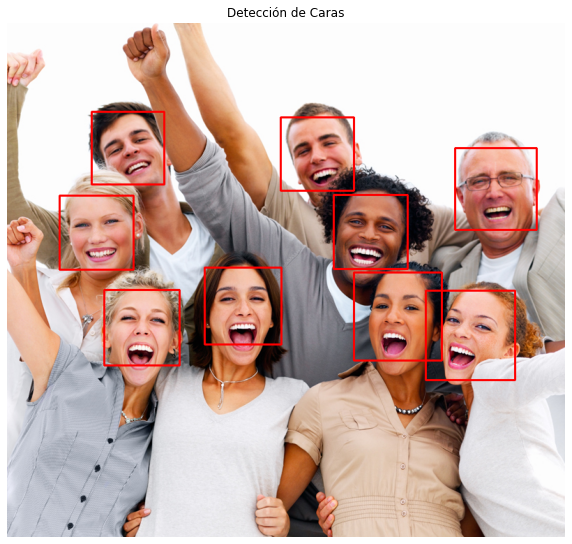

In [2]:
#Lectura del Modelo Pre-Entrenado
modelo_caras = cv2.CascadeClassifier('./Modelos/haarcascade_frontalface_default.xml')

#Operación de Detección de Caras 
caras = modelo_caras.detectMultiScale(Gris, 1.3, 5)

#Inserción de Rectángulos en la Imagen
for (x,y,w,h) in caras:
     cv2.rectangle(Grupo,(x,y),(x+w,y+h),(255,0,0),2)

#Impresión de la Imagen
plt.imshow(Grupo)
plt.axis('off')
plt.title("Detección de Caras")
plt.show()

### Detección de Sonrisas
Se empleará el modelo pre-entrenado para la detección de sonrisas en la imagen. Este modelo está almacenado en el archivo `haarcascade_smile.xml` dentro de la carpeta `Modelos`. Para ello se debe de cargar el modelo pre-entrenado empleando el método `.CascadeClassifier()`, cuyo argumento es el nombre del archivo `XML` que contiene el entrenamiento.

Para este ejemplo emplearemos la imagen `Grupo` en escala de grises para que sea más correcta la determinación de la operación de **Detección de Sorisas**, esto es:

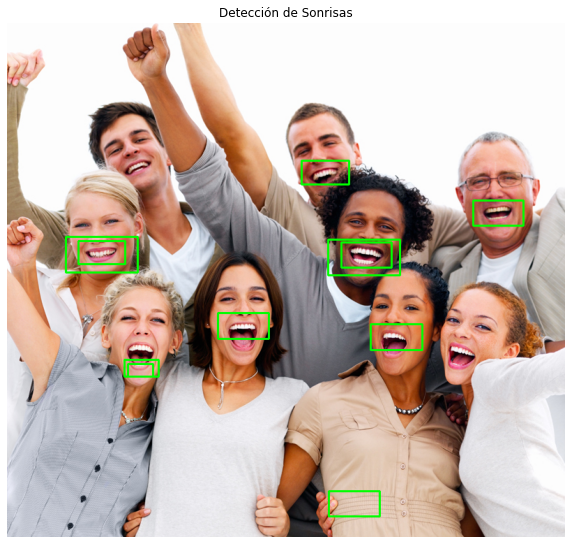

In [3]:
#Nueva Lectura de la Imagen Original
Prueba = cv2.cvtColor(cv2.imread("./Imagenes/Grupo.jpg"), cv2.COLOR_BGR2RGB)   

#Lectura del Modelo Pre-Entrenado
modelo_risas = cv2.CascadeClassifier('./Modelos/haarcascade_smile.xml')

#Operación de Detección de Sonrisas
risas = modelo_risas.detectMultiScale(Gris, 1.3, 15)

#Inserción de Rectángulos en la Imagen
for (x,y,w,h) in risas:
     cv2.rectangle(Prueba,(x,y),(x+w,y+h),(0,255,0),2)

#Impresión de la Imagen
plt.imshow(Prueba)
plt.axis('off')
plt.title("Detección de Sonrisas")
plt.show()

Del resultado obtenido, es posible ver que se detectaron las sonrisas de manera adecuada, pero también hay *falsos positivos* y *falsos negativos* como es usual en la aplicación del modelo de **Clasificación en Cascada**. 

Por lo tanto, para mejorar este proceso, se considerarán solamente las sonrisas dentro de las caras que fueron detectadas con anterioridad, esto es:

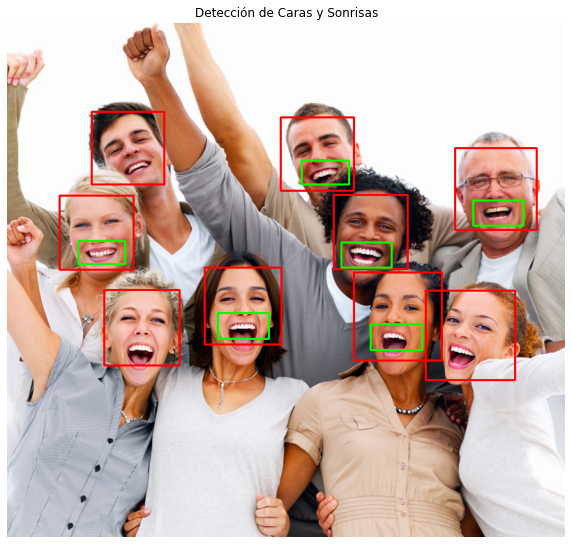

In [4]:
#Operación de Detección de Sonrisas en Caras
for (x,y,w,h) in caras:
  for (x_s,y_s,w_s,h_s) in risas:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(Grupo, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)

#Impresión de la Imagen
plt.imshow(Grupo)
plt.axis('off')
plt.title("Detección de Caras y Sonrisas")
plt.show()

### Detección de Ojos
Se empleará el modelo pre-entrenado para la detección de ojos en la imagen. Este modelo está almacenado en el archivo `haarcascade_frontalface_default.xml` dentro de la carpeta `Modelos`. Para ello se debe de cargar el modelo pre-entrenado empleando el método `.CascadeClassifier()`, cuyo argumento es el nombre del archivo `XML` que contiene el entrenamiento.

Para este ejemplo emplearemos la imagen `Grupo` en escala de grises para que sea más correcta la determinación de la operación de **Detección de Ojos**, esto es:

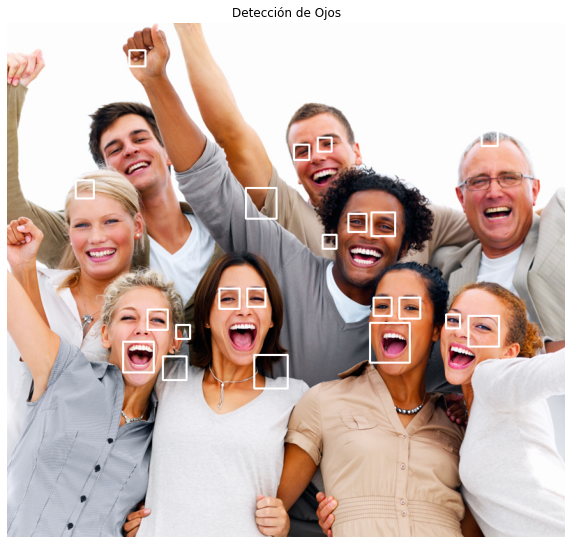

In [5]:
#Nueva Lectura de la Imagen Original
Prueba = cv2.cvtColor(cv2.imread("./Imagenes/Grupo.jpg"), cv2.COLOR_BGR2RGB) 

#Lectura del Modelo Pre-Entrenado
modelo_ojos = cv2.CascadeClassifier('./Modelos/haarcascade_eye.xml')

#Operación de Detección de Ojos
ojos = modelo_ojos.detectMultiScale(Gris, 1.3, 1)

#Inserción de Rectángulos en la Imagen
for (x,y,w,h) in ojos:
     cv2.rectangle(Prueba,(x,y),(x+w,y+h),(255,255,255),2)

#Impresión de la Imagen
plt.imshow(Prueba)
plt.axis('off')
plt.title("Detección de Ojos")
plt.show()

De manera similar al resultado obtenido de la clasificación de sonrisas, es posible ver que se detectaron los ojos de manera adecuada, pero también hay *falsos positivos* y *falsos negativos* como es usual en la aplicación del modelo de **Clasificación en Cascada**. 

Por lo tanto, para mejorar este proceso, se considerarán solamente los ojos dentro de las caras que fueron detectadas con anterioridad, esto es:

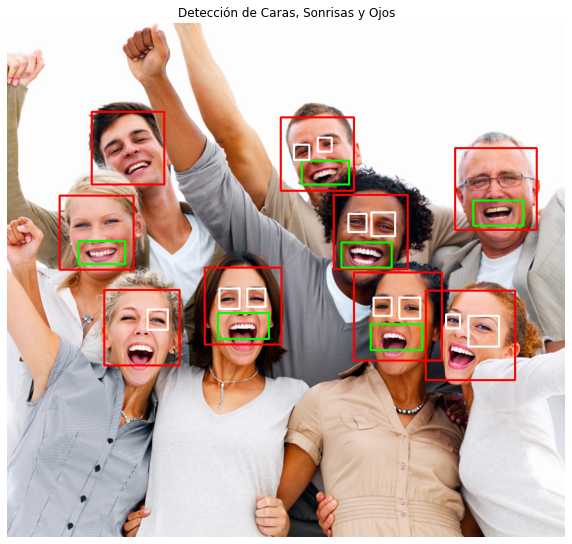

In [6]:
#Operación de Detección de Ojos en Caras
for (x,y,w,h) in caras:
  for (x_s,y_s,w_s,h_s) in ojos:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(Grupo, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)

#Impresión de la Imagen
plt.imshow(Grupo)
plt.axis('off')
plt.title("Detección de Caras, Sonrisas y Ojos")
#plt.imsave('./Imagenes/Grupo_Clas.jpg', Grupo)
plt.show()

### Técnicas Modernas de Reconocimiento de Objetos
A pesar de que la mayoría de las aplicaciones de detección de objetos han sido reemplazados en la actualidad por soluciones basadas en modelos de **Aprendizaje Profundo (Deep Learning)** como las **Redes Neuronales Convolucionales (Convolutional Neural Networks)** cuyo proceso de creación y entrenamiento se aplican en plataformas como ***Tensorflow*** (tema que se abordará brevemente al final de curso), el método mostrado para detección de caras es muy empleado por su facilidad de uso así como su rapidez, empleando **OpenCV** como su plataforma base.

<div class="alert alert-block alert-danger">
<b>.: Fin del Tema :.</b>
</div>